## Prophet model for time series analysis of climate data

In [129]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [130]:
# load data

data = pd.read_csv('DailyDelhiClimateTrain.csv',index_col='date',parse_dates=True)

# check the data

data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [132]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

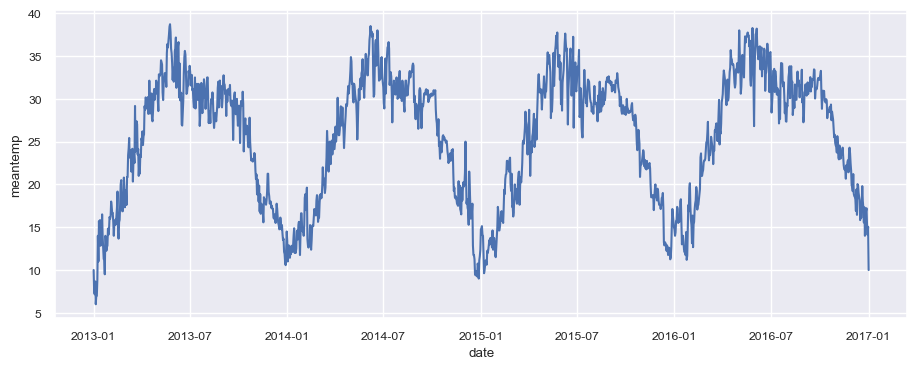

In [133]:
sns.set(rc={'figure.figsize':(11,4)},font_scale=0.8)
sns.lineplot(x=data.index,y='meantemp',data=data)


In [134]:
# drawing plot on plotly


fig = px.line(data,x=data.index,y='meantemp',title='Mean Temperature in Delhi')


fig.show()

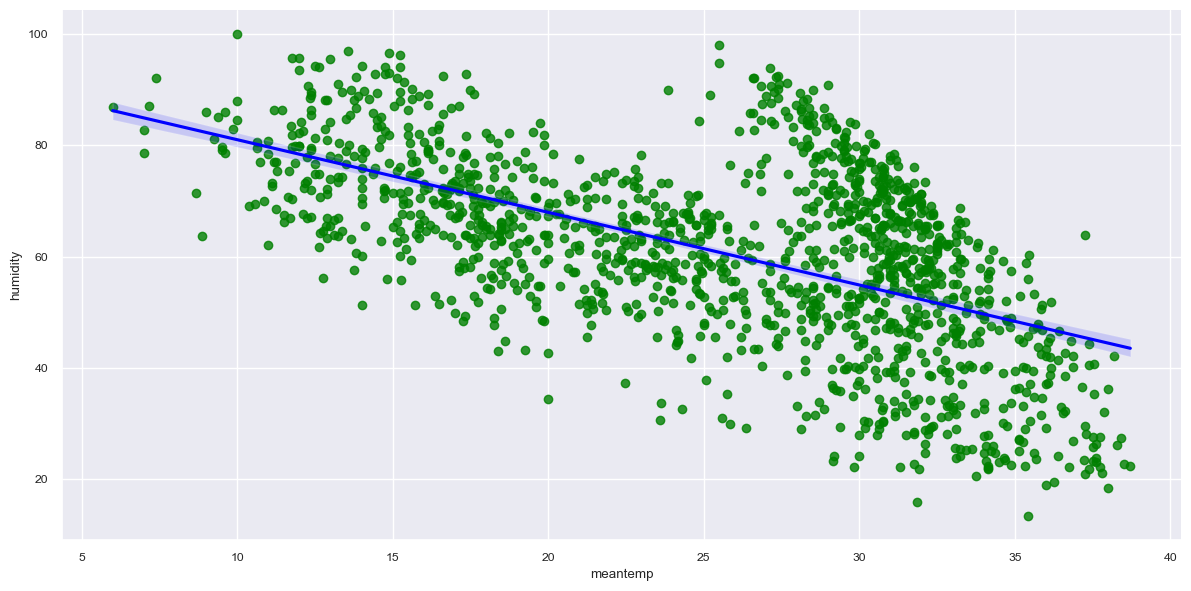

In [135]:
# plot scatter plot between mean temperature and humidity with trend line

sns.lmplot(x='meantemp',y='humidity',data=data,aspect=2,height=6,
           col_order=['meantemp','humidity'],scatter_kws={'color':'green'},line_kws={'color':'blue'})







<Axes: >

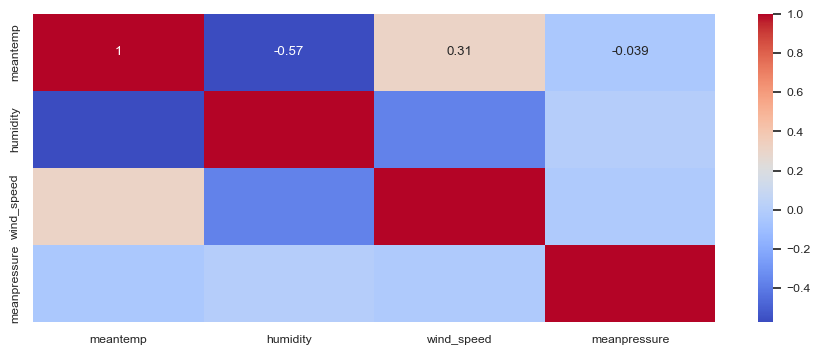

In [136]:
# create heatmap

sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


In [137]:
# lets scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled,columns=data.columns)

data_scaled.describe()



,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.132009
std,0.224614,0.193709,0.108044,0.023460
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.130770
50%,0.663755,0.568276,0.147363,0.131679
75%,0.773540,0.679094,0.218812,0.132509
max,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='date', ylabel='meantemp'>

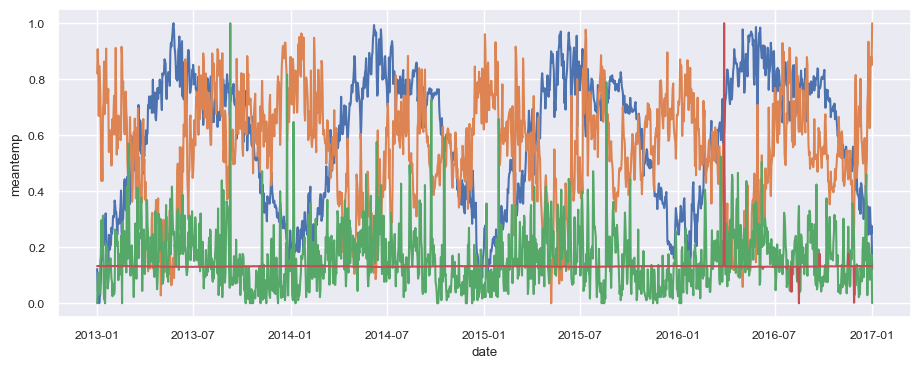

In [138]:
sns.set(rc={'figure.figsize':(11,4)},font_scale=0.8)
sns.lineplot(x=data.index,y='meantemp',data=data_scaled)
sns.lineplot(x=data.index,y='humidity',data=data_scaled)
sns.lineplot(x=data.index,y='wind_speed',data=data_scaled)
sns.lineplot(x=data.index,y='meanpressure',data=data_scaled)


([<matplotlib.axis.YTick at 0x2b53b21b2d0>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

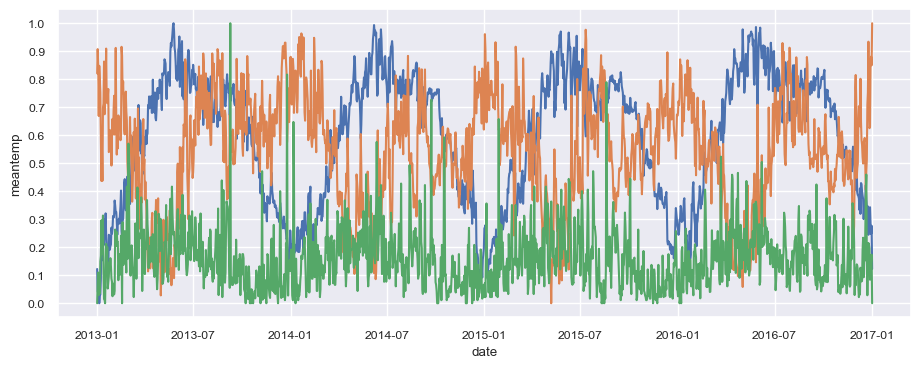

In [139]:
# removing outlier of 28 March 2016 from meanpressure of specific date by taking mean of previous and next date

data.loc['2016-03-28','meanpressure'] = (data.loc['2016-03-27','meanpressure'] + data.loc['2016-03-29','meanpressure'])/2

# lets scale the data again

data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled,columns=data.columns)

data_scaled.describe()

sns.set(rc={'figure.figsize':(11,4)},font_scale=0.8)
sns.lineplot(x=data.index,y='meantemp',data=data_scaled)
sns.lineplot(x=data.index,y='humidity',data=data_scaled)
sns.lineplot(x=data.index,y='wind_speed',data=data_scaled)
plt.yticks(np.arange(0,1.1,0.1))






In [140]:
# add two columns of month and year

data['month'] = data.index.month
data['year'] = data.index.year

data.head()


,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [141]:
print(data.index.year.unique())
data.index.month.unique()

Index([2013, 2014, 2015, 2016, 2017], dtype='int32', name='date')


Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='date')

<Axes: xlabel='month', ylabel='meantemp'>

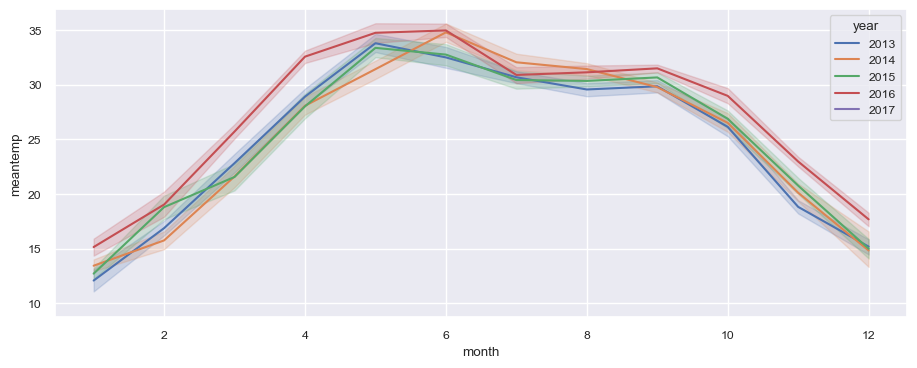

In [142]:

sns.lineplot(x='month', y='meantemp', data=data, hue='year', palette='deep')


In [144]:
# plot the lineplot in plotly express

fig = px.line(data,x='month',y='meantemp',title='Mean Temperature in Delhi',facet_col='year')
fig.show()